# EDA WITH DATA OF INTEREST

In this script we perform an exploratory data analysis before starting to apply time series methods.

In [45]:
# Importing packages:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [46]:
file_path = "../../data/02_intermediate/"
file_name = "b2-transactions.csv"

filtered_file_name='filtered_transactions_not_clean.csv' # "c1-filtered_transactions.csv"

sep=";"

In [47]:
dict_of_products={'croissant': 100,
                  'croissant petit': 103,
                  'tarta mousse 3 chocolates': 10002,
                  'tarta de manzana 2º': 462,
                  'palmeras de trufa': 182,
                  'tarta opera': 414,
                  'postre fresas y mascarpone': 4511,
                  'milhojas frambuesa 2º': 459,
                  'torteles': 112,
                  'baguette': 115}

In [48]:
filtered_df=pd.read_csv(file_path+filtered_file_name, sep=sep)

In [49]:
filtered_df.describe()

,Unnamed: 0,product_id,section,units_ordered
count,298.000000,298.000000,298.0,298.000000
mean,4944.087248,1112.895973,0.0,4.865772
std,2938.440704,2252.676382,0.0,7.909554
min,32.000000,100.000000,0.0,0.000000
25%,2320.500000,112.000000,0.0,0.000000
50%,4879.500000,453.000000,0.0,2.000000
75%,7480.500000,462.000000,0.0,6.000000
max,9995.000000,9999.000000,0.0,40.000000


In [50]:
filtered_df.shape

(298, 9)

In [51]:
filtered_df.head()

,Unnamed: 0,product_id,description,section,store,desc_normalized,target_names_prod_by_prod,date,units_ordered
0,5885,100.0,CROISANTS,0,BmUP,croissant,croissant simple,2013-10-01,18
1,9326,462.0,MANZANA 2º,0,BmUP,manzana 2,tarta de manzana,2012-12-01,2
2,9323,459.0,MILHOJAS FRAMBUESA 2º,0,BmUP,milhojas frambuesa 2,milhojas frambuesa,2012-12-01,3
3,9346,182.0,PALMERAS DE TRUFA,0,BmUP,palmera de trufa,palmera chocolate,2012-12-01,4
4,8026,459.0,MILHOJAS FRAMBUESA 2º,0,BmUP,milhojas frambuesa 2,milhojas frambuesa,2012-12-01,0


In [52]:
filtered_df['target_names_prod_by_prod'].unique()

array(['croissant simple', 'tarta de manzana', 'milhojas frambuesa',
       'palmera chocolate', 'tarta opera', 'baguette', 'tortel',
       'croissant petit', 'postre de fresas y mascarpone',
       'mousse tres chocolates'], dtype=object)

In [54]:
filtered_df[filtered_df['target_names_prod_by_prod']=='frambuesa 2']

,Unnamed: 0,product_id,description,section,store,desc_normalized,target_names_prod_by_prod,date,units_ordered


In [55]:
filtered_df.rename(columns={'Unnamed: 0':'original_index'}, inplace=True)

In [69]:
products=filtered_df['target_names_prod_by_prod'].unique()
stores=filtered_df['store'].unique()

In [70]:
print(stores)

['BmUP']


In [71]:
print(products)

['croissant simple' 'tarta de manzana' 'milhojas frambuesa'
 'palmera chocolate' 'tarta opera' 'baguette' 'tortel' 'croissant petit'
 'postre de fresas y mascarpone' 'mousse tres chocolates']


In [72]:
aaa=pd.pivot_table(data=filtered_df,values='units_ordered', index='date', columns=['store','target_names_prod_by_prod'])

In [74]:
aaa.head()

store                         BmUP                                   \
target_names_prod_by_prod baguette croissant petit croissant simple   
date                                                                  
2009-06-16                     2.0             5.0              0.0   
2009-06-28                     NaN             NaN              6.0   
2012-07-01                     NaN             NaN              NaN   
2012-08-01                     NaN             NaN              NaN   
2012-09-04                     NaN             NaN              NaN   

store                                                                \
target_names_prod_by_prod milhojas frambuesa mousse tres chocolates   
date                                                                  
2009-06-16                               NaN                    0.0   
2009-06-28                               NaN                    NaN   
2012-07-01                               3.0                    NaN   
2012-08-01                               1.0                    NaN   
2012-09-04                               1.0                    NaN   

store                                                                      \
target_names_prod_by_prod palmera chocolate postre de fresas y mascarpone   
date                                                                        
2009-06-16                              NaN                           NaN   
2009-06-28                              NaN                           NaN   
2012-07-01                              0.0                           6.0   
2012-08-01                              NaN                           NaN   
2012-09-04                              NaN                           NaN   

store                                                          
target_names_prod_by_prod tarta de manzana tarta opera tortel  
date                                                           
2009-06-16                             NaN         NaN    0.0  
2009-06-28                             NaN         NaN    NaN  
2012-07-01                             2.0         NaN    NaN  
2012-08-01                             1.0         NaN    NaN  
2012-09-04                             1.0         NaN    NaN

In [75]:
aaa.fillna(0.0, inplace=True)

In [76]:
aaa.head()

store                         BmUP                                   \
target_names_prod_by_prod baguette croissant petit croissant simple   
date                                                                  
2009-06-16                     2.0             5.0              0.0   
2009-06-28                     0.0             0.0              6.0   
2012-07-01                     0.0             0.0              0.0   
2012-08-01                     0.0             0.0              0.0   
2012-09-04                     0.0             0.0              0.0   

store                                                                \
target_names_prod_by_prod milhojas frambuesa mousse tres chocolates   
date                                                                  
2009-06-16                               0.0                    0.0   
2009-06-28                               0.0                    0.0   
2012-07-01                               3.0                    0.0   
2012-08-01                               1.0                    0.0   
2012-09-04                               1.0                    0.0   

store                                                                      \
target_names_prod_by_prod palmera chocolate postre de fresas y mascarpone   
date                                                                        
2009-06-16                              0.0                           0.0   
2009-06-28                              0.0                           0.0   
2012-07-01                              0.0                           6.0   
2012-08-01                              0.0                           0.0   
2012-09-04                              0.0                           0.0   

store                                                          
target_names_prod_by_prod tarta de manzana tarta opera tortel  
date                                                           
2009-06-16                             0.0         0.0    0.0  
2009-06-28                             0.0         0.0    0.0  
2012-07-01                             2.0         0.0    0.0  
2012-08-01                             1.0         0.0    0.0  
2012-09-04                             1.0         0.0    0.0

In [81]:
prov=filtered_df.groupby(['target_names_prod_by_prod','date'], as_index=False).sum()[['target_names_prod_by_prod', 'date', 'units_ordered']]

In [82]:
bbb=pd.pivot_table(data=prov,values='units_ordered', index='date', columns='target_names_prod_by_prod')

In [83]:
bbb.fillna(0.0, inplace=True)

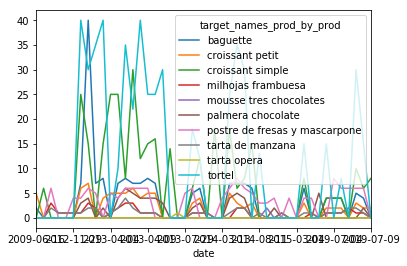

In [87]:
bbb.plot()

In [88]:
bbb.max()

target_names_prod_by_prod
baguette                         40.0
croissant petit                   7.0
croissant simple                 30.0
milhojas frambuesa                3.0
mousse tres chocolates            2.0
palmera chocolate                 6.0
postre de fresas y mascarpone     8.0
tarta de manzana                  4.0
tarta opera                       1.0
tortel                           40.0
dtype: float64